<a href="https://colab.research.google.com/github/brentershoff/IV-Model/blob/main/Copy_of_IV_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install relevant packages

install.packages("dplyr")
library(dplyr)
library(ggplot2)
install.packages("ivreg")
library(ivreg)
install.packages("modelsummary")
library(modelsummary)
install.packages("tableone")
library(tableone)
install.packages("kableExtra")
library(kableExtra)
install.packages("sensemakr")
library(sensemakr)

#display

options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘zoo’, ‘car’, ‘Formula’, ‘lmtest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘webshot’, ‘bayestestR’, ‘datawizard’, ‘checkmate’, ‘insight’, ‘kableExtra’, ‘parameters’, ‘performance’, ‘tables’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘m

In [ ]:
#load original dataset
dil=read.csv("dilex.csv")

In [ ]:
#inspect how much data is missing in the original dataset
dil%>%
summarise_all(funs(sum(is.na(.))))

DAY_SINCE_INTERVENTION,CASE_SRV_NAME,ASA_SCORE,ASA_EMERGENT,WEIGHT_KG,IDEAL_BODY_WEIGHT_KG,BMI,ANES_TYPE_HANDOFF,DURATION,AGE,SEX,FENTANYL_MG,MORPHINE_MG,HYDROMORPHONE_MG,KETAMINE_GTT,PONV_PPX_COUNT,PONV_TX_COUNT,FIRST_PAIN_SCORE,LAST_PAIN_SCORE,EQUIV_MSO4_IV_DOSE_60,EQUIV_MSO4_IV_DOSE_120,UCLA_LOC_GROUP,HOURS_TO_REINTUBATION,FLOOR_2_ICU_YN,POSTOP_MSO4_EQUIV_IV_TOTAL,POSTOP_MSO4_EQUIV_PO_TOTAL,POSTOP_OPIOIDS_PCA,POSTOP_OPIOIDS_GTT,MAX_PAIN_SCORE_DAY1,MAX_PAIN_SCORE_DAY2,MAX_PAIN_SCORE_DAY3,MIN_PAIN_SCORE_DAY1,MIN_PAIN_SCORE_DAY2,MIN_PAIN_SCORE_DAY3,AVG_PAIN_SCORE_DAY1,AVG_PAIN_SCORE_DAY2,AVG_PAIN_SCORE_DAY3,MEDIAN_PAIN_SCORE_DAY1,MEDIAN_PAIN_SCORE_DAY2,MEDIAN_PAIN_SCORE_DAY3,MSO4_EQUIV_DOSE_IV_DAY1,MSO4_EQUIV_DOSE_IV_DAY2,MSO4_EQUIV_DOSE_IV_DAY3,MSO4_EQUIV_DOSE_PO_DAY1,MSO4_EQUIV_DOSE_PO_DAY2,MSO4_EQUIV_DOSE_PO_DAY3,COUNT_PAIN_SCORE_MILD_DAY1,COUNT_PAIN_SCORE_MILD_DAY2,COUNT_PAIN_SCORE_MILD_DAY3,COUNT_PAIN_SCORE_MODERATE_DAY1,COUNT_PAIN_SCORE_MODERATE_DAY2,COUNT_PAIN_SCORE_MODERATE_DAY3,COUNT_PAIN_SCORE_DAY1,COUNT_PAIN_SCORE_DAY2,COUNT_PAIN_SCORE_DAY3,COUNT_PAIN_SCORE_GTE7_DAY1,COUNT_PAIN_SCORE_GTE7_DAY2,COUNT_PAIN_SCORE_GTE7_DAY3,CAM_ICU_7A_7P_DAY1,CAM_ICU_7A_7P_DAY2,CAM_ICU_7A_7P_DAY3,CAM_ICU_7P_7A_DAY1,CAM_ICU_7P_7A_DAY2,CAM_ICU_7P_7A_DAY3,PCA_YN_DAY1,PCA_YN_DAY2,PCA_YN_DAY3,PCEA_YN_DAY1,PCEA_YN_DAY2,PCEA_YN_DAY3,TX_OPIOIDS_DAY1,TX_OPIOIDS_DAY2,TX_OPIOIDS_DAY3,TX_NSAIDS_DAY1,TX_NSAIDS_DAY2,TX_NSAIDS_DAY3,TX_SSRI_SNRI_DAY1,TX_SSRI_SNRI_DAY2,TX_SSRI_SNRI_DAY3,TX_MS_AGENTS_DAY1,TX_MS_AGENTS_DAY2,TX_MS_AGENTS_DAY3,TX_TRICYCLICS_DAY1,TX_TRICYCLICS_DAY2,TX_TRICYCLICS_DAY3,TX_NA_CHANNEL_BLK_DAY1,TX_NA_CHANNEL_BLK_DAY2,TX_NA_CHANNEL_BLK_DAY3,TX_MUSC_RELAXANTS_DAY1,TX_MUSC_RELAXANTS_DAY2,TX_MUSC_RELAXANTS_DAY3,TX_TYLENOL_DAY1,TX_TYLENOL_DAY2,TX_TYLENOL_DAY3,LOS_DAYS,LOS_HOURS,PRE_ADMSN_PAIN_MGMT_YN,ICU_HOURS,ICU_CALENDAR_DAYS,FIRST_PAIN_SCORE.1,LAST_PAIN_SCORE.1,INPT_DEATH_YN,DISPOSITION,DAYS_TO_NEXT_ADMSN,DAYS_TO_NEXT_ER_VISIT,PONV_FEMALE_YN,PONV_NON_SMOKER_YN,PONV_HX_PONV_YN,PONV_HR_SURGERY_YN,PONV_HR_PATIENT_YN,ANES_PLAN_GENERAL_YN
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,140,0,45,874,163,0,0,104,0,4136,19156,0,0,459,0,839,839,8476,13491,0,19141,0,5790,4298,0,0,476,4578,9448,476,4578,9448,476,4578,9448,476,4578,9448,1529,13669,16375,11282,10076,12711,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,0,0,0,0,0,0,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,208,4364,9283,2,2,2,2,2,14,14,2,0,8952,13812,0,0,0,0,0,0


In [ ]:
#filter, remove outliers, and recode some variables

dil=dil%>%
filter(AGE>=18)%>% #only include patients >=18 years of age
#I will assume that if value for post-op opioids is missing, then if a pain score is present for that time, then the missing value indicates that 
#zero opioids were given.
mutate(MSO4_EQUIV_DOSE_IV_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_IV_DAY1))%>% 
mutate(MSO4_EQUIV_DOSE_IV_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_IV_DAY2))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_PO_DAY1))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_PO_DAY2))%>%
mutate(EQUIV_MSO4_IV_DOSE_60=ifelse(is.na(EQUIV_MSO4_IV_DOSE_60)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_60))%>%
mutate(EQUIV_MSO4_IV_DOSE_120=ifelse(is.na(EQUIV_MSO4_IV_DOSE_120)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_120))%>%
mutate(POSTOP_MSO4_EQUIV_IV_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_IV_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_IV_TOTAL))%>%
mutate(POSTOP_MSO4_EQUIV_PO_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_PO_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_PO_TOTAL))%>%
mutate(FENTANYL_MG=ifelse(is.na(FENTANYL_MG),0,FENTANYL_MG))%>%
#when fentanyl is missing, it means that 0 fentanyl was given intraoperatively
mutate(ANES_TYPE_HANDOFF=ifelse(ANES_TYPE_HANDOFF=="GENERAL",1,0))%>%
#I create a variable "general" which is 1 if the patient had only general, and 0 otherwise
filter(HYDROMORPHONE_MG<40)%>%
#There were a few errors in diaudid doses, I removed values where dilaudid was >40 and value where it was exactly 11.2 
filter(HYDROMORPHONE_MG!=11.2)%>%
filter(BMI<120)%>% #120 #as these are likely errors where weight went into the BMI field
filter(UCLA_LOC_GROUP=="RR OR"|UCLA_LOC_GROUP=="SM OR")%>%
filter(DURATION<1500)%>%


mutate(case=1)%>%
mutate(case=ifelse(CASE_SRV_NAME=="Dentistry-Hospital"|CASE_SRV_NAME=="Pediatrics, Hematology and Oncology"|
                   CASE_SRV_NAME=="Medicine, Hematology and Oncology"|CASE_SRV_NAME=="Ophthalmology"|
                   CASE_SRV_NAME=="Podiatry"|CASE_SRV_NAME=="Radiology"|CASE_SRV_NAME=="Medicine, Gastroenterology"
                   |CASE_SRV_NAME=="Medicine, Pulmonary Disease",2,case))%>%
mutate(case=ifelse(CASE_SRV_NAME=="Surgery, Cardiac",0,case))

In [ ]:
#how much missing data in the new dataset
dil%>%
summarise_all(funs(sum(is.na(.))))

DAY_SINCE_INTERVENTION,CASE_SRV_NAME,ASA_SCORE,ASA_EMERGENT,WEIGHT_KG,IDEAL_BODY_WEIGHT_KG,BMI,ANES_TYPE_HANDOFF,DURATION,AGE,SEX,FENTANYL_MG,MORPHINE_MG,HYDROMORPHONE_MG,KETAMINE_GTT,PONV_PPX_COUNT,PONV_TX_COUNT,FIRST_PAIN_SCORE,LAST_PAIN_SCORE,EQUIV_MSO4_IV_DOSE_60,EQUIV_MSO4_IV_DOSE_120,UCLA_LOC_GROUP,HOURS_TO_REINTUBATION,FLOOR_2_ICU_YN,POSTOP_MSO4_EQUIV_IV_TOTAL,POSTOP_MSO4_EQUIV_PO_TOTAL,POSTOP_OPIOIDS_PCA,POSTOP_OPIOIDS_GTT,MAX_PAIN_SCORE_DAY1,MAX_PAIN_SCORE_DAY2,MAX_PAIN_SCORE_DAY3,MIN_PAIN_SCORE_DAY1,MIN_PAIN_SCORE_DAY2,MIN_PAIN_SCORE_DAY3,AVG_PAIN_SCORE_DAY1,AVG_PAIN_SCORE_DAY2,AVG_PAIN_SCORE_DAY3,MEDIAN_PAIN_SCORE_DAY1,MEDIAN_PAIN_SCORE_DAY2,MEDIAN_PAIN_SCORE_DAY3,MSO4_EQUIV_DOSE_IV_DAY1,MSO4_EQUIV_DOSE_IV_DAY2,MSO4_EQUIV_DOSE_IV_DAY3,MSO4_EQUIV_DOSE_PO_DAY1,MSO4_EQUIV_DOSE_PO_DAY2,MSO4_EQUIV_DOSE_PO_DAY3,COUNT_PAIN_SCORE_MILD_DAY1,COUNT_PAIN_SCORE_MILD_DAY2,COUNT_PAIN_SCORE_MILD_DAY3,COUNT_PAIN_SCORE_MODERATE_DAY1,COUNT_PAIN_SCORE_MODERATE_DAY2,COUNT_PAIN_SCORE_MODERATE_DAY3,COUNT_PAIN_SCORE_DAY1,COUNT_PAIN_SCORE_DAY2,COUNT_PAIN_SCORE_DAY3,COUNT_PAIN_SCORE_GTE7_DAY1,COUNT_PAIN_SCORE_GTE7_DAY2,COUNT_PAIN_SCORE_GTE7_DAY3,CAM_ICU_7A_7P_DAY1,CAM_ICU_7A_7P_DAY2,CAM_ICU_7A_7P_DAY3,CAM_ICU_7P_7A_DAY1,CAM_ICU_7P_7A_DAY2,CAM_ICU_7P_7A_DAY3,PCA_YN_DAY1,PCA_YN_DAY2,PCA_YN_DAY3,PCEA_YN_DAY1,PCEA_YN_DAY2,PCEA_YN_DAY3,TX_OPIOIDS_DAY1,TX_OPIOIDS_DAY2,TX_OPIOIDS_DAY3,TX_NSAIDS_DAY1,TX_NSAIDS_DAY2,TX_NSAIDS_DAY3,TX_SSRI_SNRI_DAY1,TX_SSRI_SNRI_DAY2,TX_SSRI_SNRI_DAY3,TX_MS_AGENTS_DAY1,TX_MS_AGENTS_DAY2,TX_MS_AGENTS_DAY3,TX_TRICYCLICS_DAY1,TX_TRICYCLICS_DAY2,TX_TRICYCLICS_DAY3,TX_NA_CHANNEL_BLK_DAY1,TX_NA_CHANNEL_BLK_DAY2,TX_NA_CHANNEL_BLK_DAY3,TX_MUSC_RELAXANTS_DAY1,TX_MUSC_RELAXANTS_DAY2,TX_MUSC_RELAXANTS_DAY3,TX_TYLENOL_DAY1,TX_TYLENOL_DAY2,TX_TYLENOL_DAY3,LOS_DAYS,LOS_HOURS,PRE_ADMSN_PAIN_MGMT_YN,ICU_HOURS,ICU_CALENDAR_DAYS,FIRST_PAIN_SCORE.1,LAST_PAIN_SCORE.1,INPT_DEATH_YN,DISPOSITION,DAYS_TO_NEXT_ADMSN,DAYS_TO_NEXT_ER_VISIT,PONV_FEMALE_YN,PONV_NON_SMOKER_YN,PONV_HX_PONV_YN,PONV_HR_SURGERY_YN,PONV_HR_PATIENT_YN,ANES_PLAN_GENERAL_YN,case,cat
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,39,0,0,172,0,0,0,0,0,0,6735,0,0,103,0,246,246,156,199,0,6717,0,82,38,0,0,89,868,2619,89,868,2619,89,868,2619,89,868,2619,50,841,5502,86,861,3947,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,0,0,0,0,0,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,795,2563,0,0,0,0,0,0,0,0,0,3047,4731,0,0,0,0,0,0,0,0


In [ ]:
dil0=dil
#create saved version of dataset before removing dates

#the primary dataset will use these days, for sensitivity analysis will redo with the dil0 dataset
dil=dil%>%
filter(DAY_SINCE_INTERVENTION<142)%>%
#filter(DAY_SINCE_INTERVENTION>-142)%>%
filter(DAY_SINCE_INTERVENTION>-250)%>%
mutate(cat=0)%>%
mutate(cat=ifelse(DAY_SINCE_INTERVENTION>=0 &DAY_SINCE_INTERVENTION<=142,1,cat))
#remove 3 days around the change point
#filter(DAY_SINCE_INTERVENTION <(-3) |DAY_SINCE_INTERVENTION >3)



In [ ]:
#save temp before create table 1
dilt=dil

#This cell will create a table 1


## Make categorical variables factors
varsToFactor <- c("case","SEX","ASA_SCORE","ASA_EMERGENT","ANES_TYPE_HANDOFF","UCLA_LOC_GROUP",
                  "KETAMINE_GTT","INPT_DEATH_YN","PRE_ADMSN_PAIN_MGMT_YN","PCEA_YN_DAY1","PCEA_YN_DAY2",'TX_OPIOIDS_DAY1',
                  'TX_OPIOIDS_DAY2','TX_NSAIDS_DAY1','TX_NSAIDS_DAY2','TX_SSRI_SNRI_DAY1','TX_SSRI_SNRI_DAY2','TX_MS_AGENTS_DAY1','TX_MS_AGENTS_DAY2',
                  'TX_TRICYCLICS_DAY1','TX_TRICYCLICS_DAY2','TX_NA_CHANNEL_BLK_DAY1','TX_NA_CHANNEL_BLK_DAY2','TX_MUSC_RELAXANTS_DAY1','TX_MUSC_RELAXANTS_DAY2',
                  'TX_TYLENOL_DAY1','TX_TYLENOL_DAY2')
dil[varsToFactor] <- lapply(dil[varsToFactor], factor)

dil=dil%>%
rename("Weight(kg)" = WEIGHT_KG, "Duration(min)"=DURATION, "ASA Score"=ASA_SCORE, "ASA(E)"=ASA_EMERGENT, Ketamine=KETAMINE_GTT, "Fentanyl(mg)"=
FENTANYL_MG, "Morphine(mg)"=MORPHINE_MG, "Anesthesia type"=ANES_TYPE_HANDOFF, "Sex(female)"=SEX, "Surgery Type"=case)

## Create a variable list
dput(names(dil))
vars <- c("Weight(kg)","BMI", "Duration(min)", "AGE", "Fentanyl(mg)","Morphine(mg)",
         "Anesthesia type","Sex(female)", "ASA Score", "ASA(E)",
                  "Ketamine", "Surgery Type")



## Create Table 1 stratified by trt
tableOne <- CreateTableOne(vars = vars, strata = c("cat"), data = dil)
p <- print(tableOne,  printToggle = FALSE, noSpaces = TRUE)
#p <- print(tableOne, nonnormal = c('BMI', 'Fentanyl(mg)','Morphine(mg)', 'Duration(min)'), printToggle = FALSE, noSpaces = TRUE)
kable(p, format = "latex", booktabs=TRUE)

#turn back to dil
dil=dilt




c("DAY_SINCE_INTERVENTION", "CASE_SRV_NAME", "ASA Score", "ASA(E)", 
"Weight(kg)", "IDEAL_BODY_WEIGHT_KG", "BMI", "Anesthesia type", 
"Duration(min)", "AGE", "Sex(female)", "Fentanyl(mg)", "Morphine(mg)", 
"HYDROMORPHONE_MG", "Ketamine", "PONV_PPX_COUNT", "PONV_TX_COUNT", 
"FIRST_PAIN_SCORE", "LAST_PAIN_SCORE", "EQUIV_MSO4_IV_DOSE_60", 
"EQUIV_MSO4_IV_DOSE_120", "UCLA_LOC_GROUP", "HOURS_TO_REINTUBATION", 
"FLOOR_2_ICU_YN", "POSTOP_MSO4_EQUIV_IV_TOTAL", "POSTOP_MSO4_EQUIV_PO_TOTAL", 
"POSTOP_OPIOIDS_PCA", "POSTOP_OPIOIDS_GTT", "MAX_PAIN_SCORE_DAY1", 
"MAX_PAIN_SCORE_DAY2", "MAX_PAIN_SCORE_DAY3", "MIN_PAIN_SCORE_DAY1", 
"MIN_PAIN_SCORE_DAY2", "MIN_PAIN_SCORE_DAY3", "AVG_PAIN_SCORE_DAY1", 
"AVG_PAIN_SCORE_DAY2", "AVG_PAIN_SCORE_DAY3", "MEDIAN_PAIN_SCORE_DAY1", 
"MEDIAN_PAIN_SCORE_DAY2", "MEDIAN_PAIN_SCORE_DAY3", "MSO4_EQUIV_DOSE_IV_DAY1", 
"MSO4_EQUIV_DOSE_IV_DAY2", "MSO4_EQUIV_DOSE_IV_DAY3", "MSO4_EQUIV_DOSE_PO_DAY1", 
"MSO4_EQUIV_DOSE_PO_DAY2", "MSO4_EQUIV_DOSE_PO_DAY3", "COUNT_PAIN_SCO


\begin{tabular}{lllll}
\toprule
  & 0 & 1 & p & test\\
\midrule
n & 4186 & 2565 &  & \\
Weight(kg) (mean (SD)) & 79.10 (20.26) & 79.94 (20.61) & 0.102 & \\
BMI (mean (SD)) & 27.43 (6.47) & 27.70 (6.53) & 0.100 & \\
Duration(min) (mean (SD)) & 246.71 (126.30) & 249.69 (135.51) & 0.359 & \\
AGE (mean (SD)) & 53.10 (16.78) & 53.28 (16.60) & 0.666 & \\
\addlinespace
Fentanyl(mg) (mean (SD)) & 0.14 (0.11) & 0.14 (0.12) & 0.397 & \\
Morphine(mg) (mean (SD)) & 6.17 (3.64) & 6.75 (5.12) & 0.804 & \\
Anesthesia type = 1 (\%) & 4105 (98.1) & 2503 (97.6) & 0.212 & \\
Sex(female) = M (\%) & 1943 (46.4) & 1234 (48.1) & 0.184 & \\
ASA Score (\%) &  &  & 0.525 & \\
\addlinespace
1 & 331 (7.9) & 182 (7.2) &  & \\
2 & 1850 (44.4) & 1123 (44.2) &  & \\
3 & 1900 (45.6) & 1177 (46.3) &  & \\
4 & 90 (2.2) & 58 (2.3) &  & \\
5 & 0 (0.0) & 1 (0.0) &  & \\
\addlinespace
ASA(E) = 1 (\%) & 197 (4.7) & 120 (4.7) & 1.000 & \\
Ketamine = 1 (\%) & 277 (6.6) & 148 (5.8) & 0.180 & \\
Surgery Type (\%) &  &  & 0.416 

In [ ]:
#transformation so that effect is for 0.2mg 
dil=dil%>%
mutate(HYDROMORPHONE_MG=HYDROMORPHONE_MG*5)

In [ ]:
#create variable daytot1 and daytot2 to be combined IV and PO opioids 
dil=dil%>%
mutate(daytot1=MSO4_EQUIV_DOSE_IV_DAY1+MSO4_EQUIV_DOSE_PO_DAY1)%>%
mutate(daytot2=MSO4_EQUIV_DOSE_IV_DAY2+MSO4_EQUIV_DOSE_PO_DAY2)

In [ ]:
#simple regressions

firstpain=lm(FIRST_PAIN_SCORE~HYDROMORPHONE_MG, data=dil)


lastpain=lm(LAST_PAIN_SCORE~HYDROMORPHONE_MG, data=dil)


morp60=lm(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG, data=dil)


morp120=lm(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG, data=dil)




maxpain1=lm(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG, data=dil)

maxpain2=lm(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG, data=dil)

avepain1=lm(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG, data=dil)

avpain2=lm(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG, data=dil)

mortot1=lm(daytot1~HYDROMORPHONE_MG, data=dil)

mortot2=lm(daytot2~HYDROMORPHONE_MG, data=dil)

models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)

coef_rename=c("HYDROMORPHONE_MG"="")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
 & Estimate= \num{0.25} & Estimate= \num{0.15} & Estimate= \num{0.14} & Estimate= \num{0.15} & Estimate= \num{0.15} & Estimate= \num{0.17}\\
 & CI=\num{0.22}, \num{0.28} & CI=\num{0.12}, \num{0.17} & CI=\num{0.12}, \num{0.16} & CI=\num{0.13}, \num{0.17} & CI=\num{0.13}, \num{0.18} & CI=\num{0.14}, \num{0.19}\\
 & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00}\\
\midrule
Num.Obs. & \num{6505} & \num{6505} & \num{6662} & \num{5883} & \num{6662} & \num{5883}\\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
 & Estimate= \num{1.47} & Estimate= \num{0.49} & Estimate= \num{5.14} & Estimate= \num{3.66}\\
 & CI=\num{0.83}, \num{2.10} & CI=\num{0.42}, \num{0.55} & CI=\num{4.77}, \num{5.51} & CI=\num{2.81}, \num{4.51}\\
 & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00}\\
\midrule
Num.Obs. & \num{6595} & \num{6552} & \num{6663} & \num{5885}\\
\bottomrule
\end{tabular}
\end{table}

In [ ]:
#multivariable regression
firstpain=lm(FIRST_PAIN_SCORE~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)


lastpain=lm(LAST_PAIN_SCORE~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)


morp60=lm(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)


morp120=lm(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)


morptot=lm(POSTOP_MSO4_EQUIV_IV_TOTAL~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)

maxpain1=lm(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)

maxpain2=lm(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)

avepain1=lm(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)

avpain2=lm(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)

mortot1=lm(daytot1~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)

mortot2=lm(daytot2~HYDROMORPHONE_MG+(ASA_SCORE)+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case, data=dil)




models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)

coef_rename=c("case"="Surgery Type", "HYDROMORPHONE_MG"="Hydromorphone (mg)", "ASA_SCORE"="ASA Score", "ASA_EMERGENT"= "ASA(E)",
"AGE"="Age", "FENTANYL_MG"="Fentanyl (mg)", "DURATION"="Duration", "WEIGHT_KG"= "Weight_kg")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")

\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
Hydromorphone (mg) & Estimate= \num{0.23} & Estimate= \num{0.13} & Estimate= \num{0.14} & Estimate= \num{0.14} & Estimate= \num{0.16} & Estimate= \num{0.15}\\
 & CI=\num{0.20}, \num{0.27} & CI=\num{0.11}, \num{0.15} & CI=\num{0.12}, \num{0.16} & CI=\num{0.12}, \num{0.16} & CI=\num{0.14}, \num{0.19} & CI=\num{0.12}, \num{0.17}\\
 & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \vphantom{2} \num{0.00}\\
ASA Score & Estimate= \num{0.39} & Estimate= \num{0.29} & Estimate= \num{0.19} & Estimate= \num{0.07} & Estimate= \num{-0.08} & Estimate= \num{0.30}\\
 & CI=\num{0.25}, \num{0.54} & CI=\num{0.19}, \num{0.40} & CI=\num{0.10}, \num{0.28} & CI=\num{-0.02}, \num{0.16} & CI=\num{-0.20}, \num{0.05} & CI=\num{0.18}, \num{0.42}\\
 & p = \num{0.00} & p = \num{0.00} & p = \nu

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
Hydromorphone (mg) & Estimate= \num{1.42} & Estimate= \num{0.46} & Estimate= \num{4.08} & Estimate= \num{3.55}\\
 & CI=\num{0.75}, \num{2.09} & CI=\num{0.39}, \num{0.53} & CI=\num{3.74}, \num{4.42} & CI=\num{2.67}, \num{4.43}\\
 & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00}\\
ASA Score & Estimate= \num{-1.89} & Estimate= \num{0.31} & Estimate= \num{-4.61} & Estimate= \num{0.54}\\
 & CI=\num{-4.91}, \num{1.14} & CI=\num{0.01}, \num{0.61} & CI=\num{-6.17}, \num{-3.06} & CI=\num{-3.56}, \num{4.64}\\
 & p = \num{0.22} & p = \num{0.05} & p = \num{0.00} & p = \num{0.80}\\
ASA(E) & Estimate= \num{-1.54} & Estimate= \num{-0.52} & Estimate= \num{4.30} & Estimate= \num{11.63}\\
 & CI=\num{-10.39}, \num{7.31} & CI=\num{-1.40}, \num{0.35} & CI=\num{-0.27}, \num{8.86} & CI=\num{0.29}, \num{22.97}\\
 & p = \num{0.73} & p = \num{0.24} & p = \num{0.07}

In [ ]:
#TSLS analysis without covariates

firstpain=ivreg(FIRST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

lastpain=ivreg(LAST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

morp60=ivreg(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG |cat, data=dil)

morp120=ivreg(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG |cat, data=dil)

morptot=ivreg(POSTOP_MSO4_EQUIV_IV_TOTAL~HYDROMORPHONE_MG |cat, data=dil)

maxpain1=ivreg(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

maxpain2=ivreg(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

avepain1=ivreg(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

avpain2=ivreg(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

morp1=ivreg(MSO4_EQUIV_DOSE_IV_DAY1~HYDROMORPHONE_MG |cat, data=dil)

morp2=ivreg(MSO4_EQUIV_DOSE_IV_DAY2~HYDROMORPHONE_MG |cat, data=dil)




mortot1=ivreg(daytot1~HYDROMORPHONE_MG |cat, data=dil)
mortot2=ivreg(daytot2~HYDROMORPHONE_MG |cat, data=dil)


models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)

coef_rename=c("HYDROMORPHONE_MG"="")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")



\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
 & Estimate= \num{-0.82} & Estimate= \num{-0.24} & Estimate= \num{-0.28} & Estimate= \num{-0.30} & Estimate= \num{-0.37} & Estimate= \num{-0.31}\\
 & CI=\num{-1.21}, \num{-0.43} & CI=\num{-0.47}, \num{-0.01} & CI=\num{-0.50}, \num{-0.06} & CI=\num{-0.51}, \num{-0.08} & CI=\num{-0.66}, \num{-0.09} & CI=\num{-0.59}, \num{-0.03}\\
 & p = \num{0.00} & p = \num{0.04} & p = \num{0.01} & p = \num{0.01} & p = \num{0.01} & p = \num{0.03}\\
\midrule
Num.Obs. & \num{6505} & \num{6505} & \num{6662} & \num{5883} & \num{6662} & \num{5883}\\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
 & Estimate= \num{1.18} & Estimate= \num{-0.27} & Estimate= \num{2.65} & Estimate= \num{-0.42}\\
 & CI=\num{-4.85}, \num{7.20} & CI=\num{-0.90}, \num{0.36} & CI=\num{-0.96}, \num{6.26} & CI=\num{-8.85}, \num{8.01}\\
 & p = \num{0.70} & p = \num{0.40} & p = \num{0.15} & p = \num{0.92}\\
\midrule
Num.Obs. & \num{6595} & \num{6552} & \num{6663} & \num{5885}\\
\bottomrule
\end{tabular}
\end{table}

In [ ]:
summary(morp60)


Call:
ivreg(formula = EQUIV_MSO4_IV_DOSE_60 ~ HYDROMORPHONE_MG | cat, 
    data = dil)

Residuals:
     Min       1Q   Median       3Q      Max 
-101.196   -9.533   -5.883    4.292 5991.942 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)         7.182     11.705   0.614    0.539
HYDROMORPHONE_MG    1.175      3.072   0.382    0.702

Diagnostic tests:
                  df1  df2 statistic p-value    
Weak instruments    1 6593    74.662  <2e-16 ***
Wu-Hausman          1 6592     0.009   0.924    
Sargan              0   NA        NA      NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75.37 on 6593 degrees of freedom
Multiple R-Squared: 0.002956,	Adjusted R-squared: 0.002805 
Wald test: 0.1463 on 1 and 6593 DF,  p-value: 0.7021 


In [ ]:
#output for tsls with covariates
firstpain=ivreg(FIRST_PAIN_SCORE~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG+case|cat +ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case ,data=dil)


lastpain=ivreg(LAST_PAIN_SCORE~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)


morp60=ivreg(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)


morp120=ivreg(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)




maxpain1=ivreg(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)

maxpain2=ivreg(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)

avepain1=ivreg(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)

avpain2=ivreg(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)

morp1=ivreg(MSO4_EQUIV_DOSE_IV_DAY1~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)

morp2=ivreg(MSO4_EQUIV_DOSE_IV_DAY2~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)

mortot1=ivreg(daytot1~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)

mortot2=ivreg(daytot2~HYDROMORPHONE_MG+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case|cat+ASA_SCORE+ASA_EMERGENT+WEIGHT_KG+BMI+as.factor(ANES_TYPE_HANDOFF)+DURATION+AGE+as.factor(SEX)+
FENTANYL_MG +case, data=dil)


models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    #"MME PACU total"=morptot,

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)



coef_rename=c("case"="Surgery Type", "HYDROMORPHONE_MG"="Hydromorphone (mg)", "ASA_SCORE"="ASA Score", "ASA_EMERGENT"= "ASA(E)",
"AGE"="Age", "FENTANYL_MG"="Fentanyl (mg)", "DURATION"="Duration", "WEIGHT_KG"= "Weight_kg")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")




\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
Hydromorphone (mg) & Estimate= \num{-0.81} & Estimate= \num{-0.23} & Estimate= \num{-0.29} & Estimate= \num{-0.28} & Estimate= \num{-0.38} & Estimate= \num{-0.27}\\
 & CI=\num{-1.18}, \num{-0.44} & CI=\num{-0.46}, \num{-0.01} & CI=\num{-0.49}, \num{-0.08} & CI=\num{-0.48}, \num{-0.09} & CI=\num{-0.65}, \num{-0.10} & CI=\num{-0.53}, \num{-0.02}\\
 & p = \num{0.00} & p = \num{0.04} & p = \num{0.01} & p = \num{0.00} & p = \num{0.01} & p = \num{0.04}\\
ASA Score & Estimate= \num{0.55} & Estimate= \num{0.35} & Estimate= \num{0.27} & Estimate= \num{0.13} & Estimate= \num{0.02} & Estimate= \num{0.36}\\
 & CI=\num{0.36}, \num{0.75} & CI=\num{0.23}, \num{0.47} & CI=\num{0.16}, \num{0.37} & CI=\num{0.02}, \num{0.23} & CI=\num{-0.13}, \num{0.16} & CI=\num{0.22}, \num{0.49}\\
 & p = \num{0.00} & p = \num{0.00} & p = 

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
Hydromorphone (mg) & Estimate= \num{0.96} & Estimate= \num{-0.23} & Estimate= \num{2.04} & Estimate= \num{-0.28}\\
 & CI=\num{-4.93}, \num{6.85} & CI=\num{-0.84}, \num{0.38} & CI=\num{-1.09}, \num{5.17} & CI=\num{-8.45}, \num{7.89}\\
 & p = \num{0.75} & p = \num{0.46} & p = \num{0.20} & p = \num{0.95}\\
ASA Score & Estimate= \num{-1.81} & Estimate= \num{0.42} & Estimate= \num{-4.26} & Estimate= \num{1.05}\\
 & CI=\num{-5.00}, \num{1.39} & CI=\num{0.09}, \num{0.74} & CI=\num{-5.92}, \num{-2.61} & CI=\num{-3.21}, \num{5.31}\\
 & p = \num{0.27} & p = \num{0.01} & p = \num{0.00} & p = \num{0.63}\\
ASA(E) & Estimate= \num{-1.60} & Estimate= \num{-0.60} & Estimate= \num{3.98} & Estimate= \num{10.96}\\
 & CI=\num{-10.48}, \num{7.28} & CI=\num{-1.51}, \num{0.30} & CI=\num{-0.66}, \num{8.62} & CI=\num{-0.55}, \num{22.46}\\
 & p = \num{0.72} & p = \num{0.19} & p = \nu

In [ ]:
#output for fentanyl covariate only

#output for tsls with covariates
firstpain=ivreg(FIRST_PAIN_SCORE~HYDROMORPHONE_MG +FENTANYL_MG|cat +FENTANYL_MG ,data=dil)


lastpain=ivreg(LAST_PAIN_SCORE~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)


morp60=ivreg(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)


morp120=ivreg(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)




maxpain1=ivreg(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)

maxpain2=ivreg(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)

avepain1=ivreg(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)

avpain2=ivreg(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)

morp1=ivreg(MSO4_EQUIV_DOSE_IV_DAY1~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)

morp2=ivreg(MSO4_EQUIV_DOSE_IV_DAY2~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)

mortot1=ivreg(daytot1~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)

mortot2=ivreg(daytot2~HYDROMORPHONE_MG+FENTANYL_MG|cat+FENTANYL_MG, data=dil)


models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    #"MME PACU total"=morptot,

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)


coef_rename=c("HYDROMORPHONE_MG"="Hydromorphone(mg)", "FENTANYL_MG"="Fentanyl(mg)")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")




\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
Hydromorphone(mg) & Estimate= \num{-0.83} & Estimate= \num{-0.25} & Estimate= \num{-0.29} & Estimate= \num{-0.30} & Estimate= \num{-0.38} & Estimate= \num{-0.32}\\
 & CI=\num{-1.22}, \num{-0.44} & CI=\num{-0.48}, \num{-0.01} & CI=\num{-0.51}, \num{-0.07} & CI=\num{-0.52}, \num{-0.09} & CI=\num{-0.67}, \num{-0.09} & CI=\num{-0.60}, \num{-0.04}\\
 & p = \num{0.00} & p = \num{0.04} & p = \num{0.01} & p = \num{0.01} & p = \num{0.01} & p = \num{0.02}\\
Fentanyl(mg) & Estimate= \num{6.10} & Estimate= \num{2.46} & Estimate= \num{2.72} & Estimate= \num{3.15} & Estimate= \num{2.99} & Estimate= \num{3.22}\\
 & CI=\num{4.01}, \num{8.18} & CI=\num{1.21}, \num{3.71} & CI=\num{1.62}, \num{3.83} & CI=\num{2.08}, \num{4.22} & CI=\num{1.52}, \num{4.45} & CI=\num{1.82}, \num{4.62}\\
 & p = \num{0.00} & p = \num{0.00} & p =

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
Hydromorphone(mg) & Estimate= \num{1.12} & Estimate= \num{-0.29} & Estimate= \num{2.11} & Estimate= \num{-0.59}\\
 & CI=\num{-4.96}, \num{7.21} & CI=\num{-0.93}, \num{0.35} & CI=\num{-1.17}, \num{5.38} & CI=\num{-9.12}, \num{7.94}\\
 & p = \num{0.72} & p = \num{0.37} & p = \num{0.21} & p = \num{0.89}\\
Fentanyl(mg) & Estimate= \num{21.32} & Estimate= \num{6.84} & Estimate= \num{182.78} & Estimate= \num{55.13}\\
 & CI=\num{-10.54}, \num{53.19} & CI=\num{3.51}, \num{10.17} & CI=\num{166.09}, \num{199.47} & CI=\num{12.33}, \num{97.94}\\
 & p = \num{0.19} & p = \num{0.00} & p = \num{0.00} & p = \num{0.01}\\
\midrule
Num.Obs. & \num{6595} & \num{6552} & \num{6663} & \num{5885}\\
\bottomrule
\end{tabular}
\end{table}

**Sensitivity Analysis**


Time windows

In [ ]:
#load original dataset
dil=read.csv("dilex.csv")
#filter, remove outliers, and recode some variables

dil=dil%>%
filter(AGE>=18)%>% #only include patients >=18 years of age
#I will assume that if value for post-op opioids is missing, then if a pain score is present for that time, then the missing value indicates that 
#zero opioids were given.
mutate(MSO4_EQUIV_DOSE_IV_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_IV_DAY1))%>% 
mutate(MSO4_EQUIV_DOSE_IV_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_IV_DAY2))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_PO_DAY1))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_PO_DAY2))%>%
mutate(EQUIV_MSO4_IV_DOSE_60=ifelse(is.na(EQUIV_MSO4_IV_DOSE_60)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_60))%>%
mutate(EQUIV_MSO4_IV_DOSE_120=ifelse(is.na(EQUIV_MSO4_IV_DOSE_120)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_120))%>%
mutate(POSTOP_MSO4_EQUIV_IV_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_IV_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_IV_TOTAL))%>%
mutate(POSTOP_MSO4_EQUIV_PO_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_PO_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_PO_TOTAL))%>%
mutate(FENTANYL_MG=ifelse(is.na(FENTANYL_MG),0,FENTANYL_MG))%>%
#when fentanyl is missing, it means that 0 fentanyl was given intraoperatively
mutate(ANES_TYPE_HANDOFF=ifelse(ANES_TYPE_HANDOFF=="GENERAL",1,0))%>%
#I create a variable "general" which is 1 if the patient had only general, and 0 otherwise
filter(HYDROMORPHONE_MG<40)%>%
#There were a few errors in diaudid doses, I removed values where dilaudid was >40 and value where it was exactly 11.2 
filter(HYDROMORPHONE_MG!=11.2)%>%
filter(BMI<120)%>% #120 #as these are likely errors where weight went into the BMI field
filter(UCLA_LOC_GROUP=="RR OR"|UCLA_LOC_GROUP=="SM OR")%>%
filter(DURATION<1500)%>%


mutate(case=1)%>%
mutate(case=ifelse(CASE_SRV_NAME=="Dentistry-Hospital"|CASE_SRV_NAME=="Pediatrics, Hematology and Oncology"|
                   CASE_SRV_NAME=="Medicine, Hematology and Oncology"|CASE_SRV_NAME=="Ophthalmology"|
                   CASE_SRV_NAME=="Podiatry"|CASE_SRV_NAME=="Radiology"|CASE_SRV_NAME=="Medicine, Gastroenterology"
                   |CASE_SRV_NAME=="Medicine, Pulmonary Disease",2,case))%>%
mutate(case=ifelse(CASE_SRV_NAME=="Surgery, Cardiac",0,case))
dil0=dil
#create saved version of dataset before removing dates

#the primary dataset will use these days, for sensitivity analysis will redo with the dil0 dataset
dil=dil%>%
filter(DAY_SINCE_INTERVENTION<142)%>%
#filter(DAY_SINCE_INTERVENTION>-142)%>%
filter(DAY_SINCE_INTERVENTION>-500)%>%
mutate(cat=0)%>%
mutate(cat=ifelse(DAY_SINCE_INTERVENTION>=0 &DAY_SINCE_INTERVENTION<=142,1,cat))
#remove 3 days around the change point
#filter(DAY_SINCE_INTERVENTION <(-3) |DAY_SINCE_INTERVENTION >3)

#transformation so that effect is for 0.2mg 
dil=dil%>%
mutate(HYDROMORPHONE_MG=HYDROMORPHONE_MG*5)

#create variable daytot1 and daytot2 to be combined IV and PO opioids 
dil=dil%>%
mutate(daytot1=MSO4_EQUIV_DOSE_IV_DAY1+MSO4_EQUIV_DOSE_PO_DAY1)%>%
mutate(daytot2=MSO4_EQUIV_DOSE_IV_DAY2+MSO4_EQUIV_DOSE_PO_DAY2)

#TSLS analysis without covariates

firstpain=ivreg(FIRST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

lastpain=ivreg(LAST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

morp60=ivreg(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG |cat, data=dil)

morp120=ivreg(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG |cat, data=dil)

morptot=ivreg(POSTOP_MSO4_EQUIV_IV_TOTAL~HYDROMORPHONE_MG |cat, data=dil)

maxpain1=ivreg(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

maxpain2=ivreg(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

avepain1=ivreg(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

avpain2=ivreg(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

morp1=ivreg(MSO4_EQUIV_DOSE_IV_DAY1~HYDROMORPHONE_MG |cat, data=dil)

morp2=ivreg(MSO4_EQUIV_DOSE_IV_DAY2~HYDROMORPHONE_MG |cat, data=dil)




mortot1=ivreg(daytot1~HYDROMORPHONE_MG |cat, data=dil)
mortot2=ivreg(daytot2~HYDROMORPHONE_MG |cat, data=dil)


models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)

coef_rename=c("HYDROMORPHONE_MG"="")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")





\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
 & Estimate= \num{-0.90} & Estimate= \num{-0.30} & Estimate= \num{-0.34} & Estimate= \num{-0.26} & Estimate= \num{-0.44} & Estimate= \num{-0.33}\\
 & CI=\num{-1.25}, \num{-0.55} & CI=\num{-0.50}, \num{-0.09} & CI=\num{-0.53}, \num{-0.15} & CI=\num{-0.44}, \num{-0.09} & CI=\num{-0.69}, \num{-0.19} & CI=\num{-0.57}, \num{-0.09}\\
 & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.00} & p = \num{0.01}\\
\midrule
Num.Obs. & \num{10572} & \num{10572} & \num{10857} & \num{9601} & \num{10857} & \num{9601}\\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
 & Estimate= \num{0.07} & Estimate= \num{-0.12} & Estimate= \num{4.33} & Estimate= \num{-1.89}\\
 & CI=\num{-4.11}, \num{4.25} & CI=\num{-0.66}, \num{0.41} & CI=\num{1.29}, \num{7.36} & CI=\num{-8.06}, \num{4.27}\\
 & p = \num{0.97} & p = \num{0.66} & p = \num{0.01} & p = \num{0.55}\\
\midrule
Num.Obs. & \num{10710} & \num{10642} & \num{10858} & \num{9603}\\
\bottomrule
\end{tabular}
\end{table}

In [ ]:
#load original dataset
dil=read.csv("dilex.csv")
#filter, remove outliers, and recode some variables

dil=dil%>%
filter(AGE>=18)%>% #only include patients >=18 years of age
#I will assume that if value for post-op opioids is missing, then if a pain score is present for that time, then the missing value indicates that 
#zero opioids were given.
mutate(MSO4_EQUIV_DOSE_IV_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_IV_DAY1))%>% 
mutate(MSO4_EQUIV_DOSE_IV_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_IV_DAY2))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_PO_DAY1))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_PO_DAY2))%>%
mutate(EQUIV_MSO4_IV_DOSE_60=ifelse(is.na(EQUIV_MSO4_IV_DOSE_60)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_60))%>%
mutate(EQUIV_MSO4_IV_DOSE_120=ifelse(is.na(EQUIV_MSO4_IV_DOSE_120)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_120))%>%
mutate(POSTOP_MSO4_EQUIV_IV_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_IV_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_IV_TOTAL))%>%
mutate(POSTOP_MSO4_EQUIV_PO_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_PO_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_PO_TOTAL))%>%
mutate(FENTANYL_MG=ifelse(is.na(FENTANYL_MG),0,FENTANYL_MG))%>%
#when fentanyl is missing, it means that 0 fentanyl was given intraoperatively
mutate(ANES_TYPE_HANDOFF=ifelse(ANES_TYPE_HANDOFF=="GENERAL",1,0))%>%
#I create a variable "general" which is 1 if the patient had only general, and 0 otherwise
filter(HYDROMORPHONE_MG<40)%>%
#There were a few errors in diaudid doses, I removed values where dilaudid was >40 and value where it was exactly 11.2 
filter(HYDROMORPHONE_MG!=11.2)%>%
filter(BMI<120)%>% #120 #as these are likely errors where weight went into the BMI field
filter(UCLA_LOC_GROUP=="RR OR"|UCLA_LOC_GROUP=="SM OR")%>%
filter(DURATION<1500)%>%


mutate(case=1)%>%
mutate(case=ifelse(CASE_SRV_NAME=="Dentistry-Hospital"|CASE_SRV_NAME=="Pediatrics, Hematology and Oncology"|
                   CASE_SRV_NAME=="Medicine, Hematology and Oncology"|CASE_SRV_NAME=="Ophthalmology"|
                   CASE_SRV_NAME=="Podiatry"|CASE_SRV_NAME=="Radiology"|CASE_SRV_NAME=="Medicine, Gastroenterology"
                   |CASE_SRV_NAME=="Medicine, Pulmonary Disease",2,case))%>%
mutate(case=ifelse(CASE_SRV_NAME=="Surgery, Cardiac",0,case))
dil0=dil
#create saved version of dataset before removing dates

#the primary dataset will use these days, for sensitivity analysis will redo with the dil0 dataset
dil=dil%>%
filter(DAY_SINCE_INTERVENTION<142)%>%
#filter(DAY_SINCE_INTERVENTION>-142)%>%
filter(DAY_SINCE_INTERVENTION>-142)%>%
mutate(cat=0)%>%
mutate(cat=ifelse(DAY_SINCE_INTERVENTION>=0 &DAY_SINCE_INTERVENTION<=142,1,cat))
#remove 3 days around the change point
#filter(DAY_SINCE_INTERVENTION <(-3) |DAY_SINCE_INTERVENTION >3)

#transformation so that effect is for 0.2mg 
dil=dil%>%
mutate(HYDROMORPHONE_MG=HYDROMORPHONE_MG*5)

#create variable daytot1 and daytot2 to be combined IV and PO opioids 
dil=dil%>%
mutate(daytot1=MSO4_EQUIV_DOSE_IV_DAY1+MSO4_EQUIV_DOSE_PO_DAY1)%>%
mutate(daytot2=MSO4_EQUIV_DOSE_IV_DAY2+MSO4_EQUIV_DOSE_PO_DAY2)

#TSLS analysis without covariates

firstpain=ivreg(FIRST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

lastpain=ivreg(LAST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

morp60=ivreg(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG |cat, data=dil)

morp120=ivreg(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG |cat, data=dil)

morptot=ivreg(POSTOP_MSO4_EQUIV_IV_TOTAL~HYDROMORPHONE_MG |cat, data=dil)

maxpain1=ivreg(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

maxpain2=ivreg(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

avepain1=ivreg(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

avpain2=ivreg(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

morp1=ivreg(MSO4_EQUIV_DOSE_IV_DAY1~HYDROMORPHONE_MG |cat, data=dil)

morp2=ivreg(MSO4_EQUIV_DOSE_IV_DAY2~HYDROMORPHONE_MG |cat, data=dil)




mortot1=ivreg(daytot1~HYDROMORPHONE_MG |cat, data=dil)
mortot2=ivreg(daytot2~HYDROMORPHONE_MG |cat, data=dil)


models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)

coef_rename=c("HYDROMORPHONE_MG"="")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")





\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
 & Estimate= \num{-0.90} & Estimate= \num{-0.37} & Estimate= \num{-0.32} & Estimate= \num{-0.38} & Estimate= \num{-0.44} & Estimate= \num{-0.42}\\
 & CI=\num{-1.42}, \num{-0.38} & CI=\num{-0.69}, \num{-0.05} & CI=\num{-0.61}, \num{-0.03} & CI=\num{-0.67}, \num{-0.08} & CI=\num{-0.83}, \num{-0.06} & CI=\num{-0.81}, \num{-0.04}\\
 & p = \num{0.00} & p = \num{0.03} & p = \num{0.03} & p = \num{0.01} & p = \num{0.02} & p = \num{0.03}\\
\midrule
Num.Obs. & \num{4784} & \num{4784} & \num{4907} & \num{4316} & \num{4907} & \num{4316}\\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
 & Estimate= \num{-1.51} & Estimate= \num{-0.50} & Estimate= \num{2.26} & Estimate= \num{-1.98}\\
 & CI=\num{-3.36}, \num{0.33} & CI=\num{-1.33}, \num{0.33} & CI=\num{-2.69}, \num{7.22} & CI=\num{-9.03}, \num{5.07}\\
 & p = \num{0.11} & p = \num{0.23} & p = \num{0.37} & p = \num{0.58}\\
\midrule
Num.Obs. & \num{4854} & \num{4817} & \num{4907} & \num{4318}\\
\bottomrule
\end{tabular}
\end{table}

In [ ]:
#load original dataset
dil=read.csv("dilex.csv")
#filter, remove outliers, and recode some variables

dil=dil%>%
filter(AGE>=18)%>% #only include patients >=18 years of age
#I will assume that if value for post-op opioids is missing, then if a pain score is present for that time, then the missing value indicates that 
#zero opioids were given.
mutate(MSO4_EQUIV_DOSE_IV_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_IV_DAY1))%>% 
mutate(MSO4_EQUIV_DOSE_IV_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_IV_DAY2))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_PO_DAY1))%>%
mutate(MSO4_EQUIV_DOSE_PO_DAY2=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY2)&!is.na(MAX_PAIN_SCORE_DAY2),0,MSO4_EQUIV_DOSE_PO_DAY2))%>%
mutate(EQUIV_MSO4_IV_DOSE_60=ifelse(is.na(EQUIV_MSO4_IV_DOSE_60)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_60))%>%
mutate(EQUIV_MSO4_IV_DOSE_120=ifelse(is.na(EQUIV_MSO4_IV_DOSE_120)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_120))%>%
mutate(POSTOP_MSO4_EQUIV_IV_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_IV_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_IV_TOTAL))%>%
mutate(POSTOP_MSO4_EQUIV_PO_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_PO_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_PO_TOTAL))%>%
mutate(FENTANYL_MG=ifelse(is.na(FENTANYL_MG),0,FENTANYL_MG))%>%
#when fentanyl is missing, it means that 0 fentanyl was given intraoperatively
mutate(ANES_TYPE_HANDOFF=ifelse(ANES_TYPE_HANDOFF=="GENERAL",1,0))%>%
#I create a variable "general" which is 1 if the patient had only general, and 0 otherwise
filter(HYDROMORPHONE_MG<40)%>%
#There were a few errors in diaudid doses, I removed values where dilaudid was >40 and value where it was exactly 11.2 
filter(HYDROMORPHONE_MG!=11.2)%>%
filter(BMI<120)%>% #120 #as these are likely errors where weight went into the BMI field
filter(UCLA_LOC_GROUP=="RR OR"|UCLA_LOC_GROUP=="SM OR")%>%
filter(DURATION<1500)%>%


mutate(case=1)%>%
mutate(case=ifelse(CASE_SRV_NAME=="Dentistry-Hospital"|CASE_SRV_NAME=="Pediatrics, Hematology and Oncology"|
                   CASE_SRV_NAME=="Medicine, Hematology and Oncology"|CASE_SRV_NAME=="Ophthalmology"|
                   CASE_SRV_NAME=="Podiatry"|CASE_SRV_NAME=="Radiology"|CASE_SRV_NAME=="Medicine, Gastroenterology"
                   |CASE_SRV_NAME=="Medicine, Pulmonary Disease",2,case))%>%
mutate(case=ifelse(CASE_SRV_NAME=="Surgery, Cardiac",0,case))
dil0=dil
#create saved version of dataset before removing dates

#the primary dataset will use these days, for sensitivity analysis will redo with the dil0 dataset
dil=dil%>%
filter(DAY_SINCE_INTERVENTION<250)%>%
#filter(DAY_SINCE_INTERVENTION>-142)%>%
filter(DAY_SINCE_INTERVENTION>-250)%>%
mutate(cat=0)%>%
mutate(cat=ifelse(DAY_SINCE_INTERVENTION>=0 &DAY_SINCE_INTERVENTION<=142,1,cat))
#remove 3 days around the change point
#filter(DAY_SINCE_INTERVENTION <(-3) |DAY_SINCE_INTERVENTION >3)

#transformation so that effect is for 0.2mg 
dil=dil%>%
mutate(HYDROMORPHONE_MG=HYDROMORPHONE_MG*5)

#create variable daytot1 and daytot2 to be combined IV and PO opioids 
dil=dil%>%
mutate(daytot1=MSO4_EQUIV_DOSE_IV_DAY1+MSO4_EQUIV_DOSE_PO_DAY1)%>%
mutate(daytot2=MSO4_EQUIV_DOSE_IV_DAY2+MSO4_EQUIV_DOSE_PO_DAY2)

#TSLS analysis without covariates

firstpain=ivreg(FIRST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

lastpain=ivreg(LAST_PAIN_SCORE~HYDROMORPHONE_MG |cat, data=dil)

morp60=ivreg(EQUIV_MSO4_IV_DOSE_60~HYDROMORPHONE_MG |cat, data=dil)

morp120=ivreg(EQUIV_MSO4_IV_DOSE_120~HYDROMORPHONE_MG |cat, data=dil)

morptot=ivreg(POSTOP_MSO4_EQUIV_IV_TOTAL~HYDROMORPHONE_MG |cat, data=dil)

maxpain1=ivreg(MAX_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

maxpain2=ivreg(MAX_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

avepain1=ivreg(AVG_PAIN_SCORE_DAY1~HYDROMORPHONE_MG |cat, data=dil)

avpain2=ivreg(AVG_PAIN_SCORE_DAY2~HYDROMORPHONE_MG |cat, data=dil)

morp1=ivreg(MSO4_EQUIV_DOSE_IV_DAY1~HYDROMORPHONE_MG |cat, data=dil)

morp2=ivreg(MSO4_EQUIV_DOSE_IV_DAY2~HYDROMORPHONE_MG |cat, data=dil)




mortot1=ivreg(daytot1~HYDROMORPHONE_MG |cat, data=dil)
mortot2=ivreg(daytot2~HYDROMORPHONE_MG |cat, data=dil)


models <- list(
  "1st PACU Pain"     = firstpain,
  "Last PACU Pain" = lastpain,    
    "Ave Pain (day 1)"=avepain1,
   "Ave Pain (day 2)"=avpain2,
     "Max Pain (day 1)"=maxpain1,
    "Max Pain (day 2)"=maxpain2
    

)
models1<- list(

"MME PACU 60min" =morp60,
    "MME PACU 120min"=morp120,
    

     'MME day1'=mortot1,
     'MME day2'=mortot2
   
)

coef_rename=c("HYDROMORPHONE_MG"="")
modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")


modelsummary(models1,estimate   =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

  coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, coef_rename=coef_rename, output = "latex")





\begin{table}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
  & 1st PACU Pain & Last PACU Pain & Ave Pain (day 1) & Ave Pain (day 2) & Max Pain (day 1) & Max Pain (day 2)\\
\midrule
 & Estimate= \num{-0.73} & Estimate= \num{-0.27} & Estimate= \num{-0.30} & Estimate= \num{-0.27} & Estimate= \num{-0.46} & Estimate= \num{-0.31}\\
 & CI=\num{-1.11}, \num{-0.34} & CI=\num{-0.51}, \num{-0.03} & CI=\num{-0.52}, \num{-0.09} & CI=\num{-0.48}, \num{-0.07} & CI=\num{-0.76}, \num{-0.17} & CI=\num{-0.58}, \num{-0.04}\\
 & p = \num{0.00} & p = \num{0.03} & p = \num{0.01} & p = \num{0.01} & p = \num{0.00} & p = \num{0.02}\\
\midrule
Num.Obs. & \num{7541} & \num{7541} & \num{7741} & \num{6832} & \num{7741} & \num{6832}\\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & MME PACU 60min & MME PACU 120min & MME day1 & MME day2\\
\midrule
 & Estimate= \num{0.94} & Estimate= \num{-0.28} & Estimate= \num{2.10} & Estimate= \num{-1.12}\\
 & CI=\num{-4.77}, \num{6.65} & CI=\num{-0.92}, \num{0.36} & CI=\num{-1.49}, \num{5.69} & CI=\num{-8.94}, \num{6.70}\\
 & p = \num{0.75} & p = \num{0.38} & p = \num{0.25} & p = \num{0.78}\\
\midrule
Num.Obs. & \num{7648} & \num{7597} & \num{7742} & \num{6834}\\
\bottomrule
\end{tabular}
\end{table}

Contour Plots

In [ ]:
model=lm(MAX_PAIN_SCORE_DAY2~BMI+cat, data=dil)
summary(model)



Call:
lm(formula = MAX_PAIN_SCORE_DAY2 ~ BMI + cat, data = dil)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5479 -1.9451  0.7687  2.0254  4.1668 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.649796   0.167386  33.753   <2e-16 ***
BMI         0.012565   0.005838   2.153   0.0314 *  
cat         0.184428   0.078479   2.350   0.0188 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.918 on 5880 degrees of freedom
  (868 observations deleted due to missingness)
Multiple R-squared:  0.001772,	Adjusted R-squared:  0.001433 
F-statistic: 5.219 on 2 and 5880 DF,  p-value: 0.005437


In [ ]:
model=lm(FIRST_PAIN_SCORE~FENTANYL_MG, data=dil)
summary(model)



Call:
lm(formula = FIRST_PAIN_SCORE ~ FENTANYL_MG, data = dil)

Residuals:
   Min     1Q Median     3Q    Max 
-5.330 -3.325 -3.038  3.618  6.962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.03804    0.07501  40.503  < 2e-16 ***
FENTANYL_MG  2.29216    0.42463   5.398 6.98e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.785 on 6503 degrees of freedom
  (246 observations deleted due to missingness)
Multiple R-squared:  0.004461,	Adjusted R-squared:  0.004308 
F-statistic: 29.14 on 1 and 6503 DF,  p-value: 6.977e-08


In [ ]:
model=lm(BMI~cat , data=dil)
summary(model)


Call:
lm(formula = BMI ~ cat, data = dil)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.729  -4.329  -1.097   3.087  82.771 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.4292     0.1004 273.327   <2e-16 ***
cat           0.2681     0.1628   1.647   0.0996 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.493 on 6749 degrees of freedom
Multiple R-squared:  0.0004018,	Adjusted R-squared:  0.0002536 
F-statistic: 2.713 on 1 and 6749 DF,  p-value: 0.09961


In [ ]:
sens=sensemakr(model=model, treatment="cat", benchmark_covariates = "BMI" ,kd=c(1,5,10,20,40))
summary(sens)

Sensitivity Analysis to Unobserved Confounding

Model Formula: MAX_PAIN_SCORE_DAY2 ~ BMI + cat

Null hypothesis: q = 1 and reduce = TRUE 
-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0 

Unadjusted Estimates of 'cat': 
  Coef. estimate: 0.1844 
  Standard Error: 0.0785 
  t-value (H0:tau = 0): 2.35 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 9e-04 
  Robustness Value, q = 1: 0.0302 
  Robustness Value, q = 1, alpha = 0.05: 0.0051 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates) that explains 100% of the residual variance of the outcome, would need to explain at least 0.09% of the residual variance of the treatment to fully account for the observed estimated effect.

-- Robustness Value, q = 1: unobserved confounders (orthogonal to the covariates) that explai

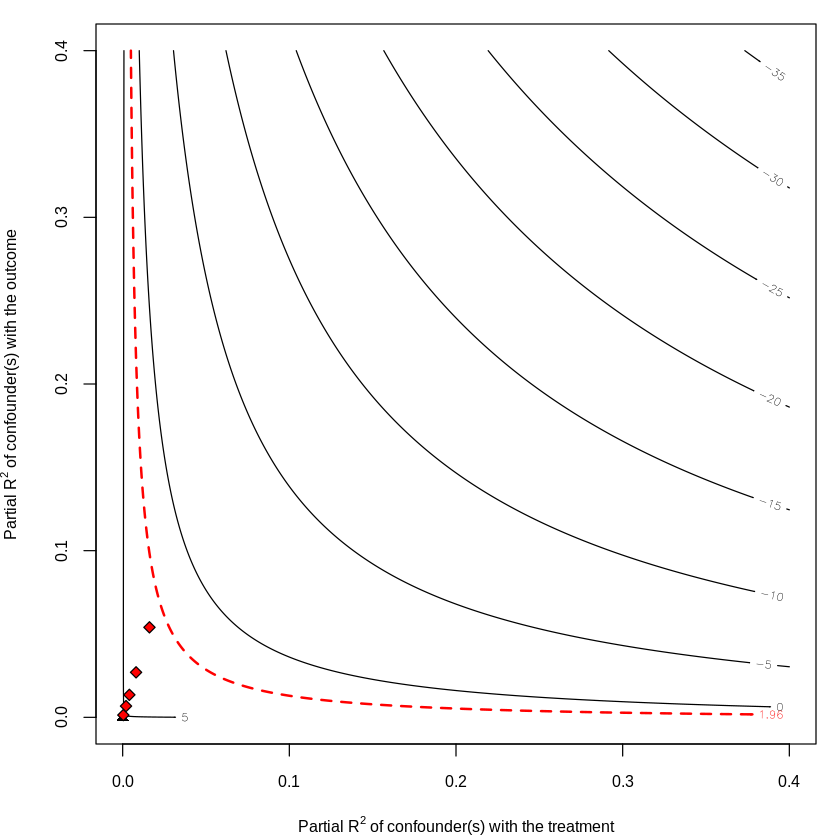

In [ ]:
plot(sens, label.text=FALSE,sensitivity.of = "t-value", cex.label.text = 0.0001)

*Falfification Tests*

In [ ]:


#load the dataset with not hydromorphone given intraop
dil1=read.csv("dilno.csv")

#perform same transformations, except for day 2 which we do not have
dil1=dil1%>%
mutate(MSO4_EQUIV_DOSE_IV_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_IV_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_IV_DAY1))%>% 

mutate(MSO4_EQUIV_DOSE_PO_DAY1=ifelse(is.na(MSO4_EQUIV_DOSE_PO_DAY1)&!is.na(MAX_PAIN_SCORE_DAY1),0,MSO4_EQUIV_DOSE_PO_DAY1))%>%

mutate(EQUIV_MSO4_IV_DOSE_60=ifelse(is.na(EQUIV_MSO4_IV_DOSE_60)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_60))%>%
mutate(EQUIV_MSO4_IV_DOSE_120=ifelse(is.na(EQUIV_MSO4_IV_DOSE_120)&!is.na(FIRST_PAIN_SCORE),0,EQUIV_MSO4_IV_DOSE_120))%>%
mutate(POSTOP_MSO4_EQUIV_IV_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_IV_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_IV_TOTAL))%>%
mutate(POSTOP_MSO4_EQUIV_PO_TOTAL=ifelse(is.na(POSTOP_MSO4_EQUIV_PO_TOTAL)&!is.na(FIRST_PAIN_SCORE),0,POSTOP_MSO4_EQUIV_PO_TOTAL))%>%
mutate(FENTANYL_MG=ifelse(is.na(FENTANYL_MG),0,FENTANYL_MG))%>%
#when fentanyl is missing, it means that 0 fentanyl was given intraoperatively
mutate(ANES_TYPE_HANDOFF=ifelse(ANES_TYPE_HANDOFF=="GENERAL",1,0))%>%
#I create a variable "general" which is 1 if the patient had only general, and 0 otherwise
filter(BMI<120)%>% #120 #as these are likely errors where weight went into the BMI field
filter(UCLA_LOC_GROUP=="RR OR"|UCLA_LOC_GROUP=="SM OR")%>%
filter(DURATION<1500)%>%


mutate(case=1)%>%
mutate(case=ifelse(CASE_SRV_NAME=="Dentistry-Hospital"|CASE_SRV_NAME=="Pediatrics, Hematology and Oncology"|
                   CASE_SRV_NAME=="Medicine, Hematology and Oncology"|CASE_SRV_NAME=="Ophthalmology"|
                   CASE_SRV_NAME=="Podiatry"|CASE_SRV_NAME=="Radiology"|CASE_SRV_NAME=="Medicine, Gastroenterology"
                   |CASE_SRV_NAME=="Medicine, Pulmonary Disease",2,case))%>%
mutate(case=ifelse(CASE_SRV_NAME=="Surgery, Cardiac",0,case))


In [ ]:
dil1=dil1%>%
filter(DAY_SINCE_INTERVENTION<142)%>%
filter(DAY_SINCE_INTERVENTION>-250)%>%
mutate(cat=0)%>%
mutate(cat=ifelse(DAY_SINCE_INTERVENTION>=0 &DAY_SINCE_INTERVENTION<=142,1,cat))
#remove 3 days around the change point
#filter(DAY_SINCE_INTERVENTION <(-3) |DAY_SINCE_INTERVENTION >3)
dim(dil1)

[1] 10408    53

In [ ]:

firstpain=(lm(FIRST_PAIN_SCORE~cat,data=dil1))

In [ ]:


firstpain=(lm(FIRST_PAIN_SCORE~cat,data=dil1))
lastpain=(lm(LAST_PAIN_SCORE~cat,data=dil1))
avepain1=(lm(AVG_PAIN_SCORE_DAY1~cat,data=dil1))

maxpain1=(lm(MAX_PAIN_SCORE_DAY1~cat,data=dil1))




firstpaina=(lm(FIRST_PAIN_SCORE~cat,data=dil))
lastpaina=(lm(LAST_PAIN_SCORE~cat,data=dil))
avepain1a=(lm(AVG_PAIN_SCORE_DAY1~cat,dat=dil))
maxpain1a=(lm(MAX_PAIN_SCORE_DAY1~cat,data=dil))

In [ ]:
models <- list(
  "firstpain"     = firstpain,
  "Last Pain" = lastpain,    
    "avepain1"=avepain1,

    'maxpain1'=maxpain1
)

models1 <- list(
  "1st Pain"     = firstpaina,
  "Last Pain" = lastpaina,    
    "avepain1"=avepain1a,

    'maxpain1'=maxpain1a
  
)


In [ ]:

modelsummary(models,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, output = "latex")


modelsummary(models1,estimate  =   "Estimate= {estimate}",
  statistic = c("CI={conf.low}, {conf.high}","p = {p.value}"),

coef_omit = "Intercept",gof_omit = 'R2|R2 Adj|F|AIC|BIC|Log.Lik', fmt=2, output = "latex")

Warning message:
“To compile a LaTeX document with this table, the following commands must be placed in the document preamble:

\usepackage{booktabs}
\usepackage{siunitx}
\newcolumntype{d}{S[input-symbols = ()]}

To disable `siunitx` and prevent `modelsummary` from wrapping numeric entries in `\num{}`, call:

options("modelsummary_format_numeric_latex" = "plain")

This warning is displayed once per session.”


\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & firstpain & Last Pain & avepain1 & maxpain1\\
\midrule
cat & Estimate= \num{0.06} & Estimate= \num{-0.01} & Estimate= \num{-0.06} & Estimate= \num{-0.05}\\
 & CI=\num{-0.08}, \num{0.19} & CI=\num{-0.11}, \num{0.09} & CI=\num{-0.15}, \num{0.03} & CI=\num{-0.20}, \num{0.09}\\
 & p = \num{0.41} & p = \num{0.87} & p = \num{0.21} & p = \num{0.47}\\
\midrule
Num.Obs. & \num{9664} & \num{9664} & \num{10135} & \num{10135}\\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\begin{tabular}[t]{lcccc}
\toprule
  & 1st Pain & Last Pain & avepain1 & maxpain1\\
\midrule
cat & Estimate= \num{0.50} & Estimate= \num{0.15} & Estimate= \num{0.17} & Estimate= \num{0.23}\\
 & CI=\num{0.31}, \num{0.69} & CI=\num{0.01}, \num{0.28} & CI=\num{0.05}, \num{0.29} & CI=\num{0.07}, \num{0.38}\\
 & p = \num{0.00} & p = \num{0.03} & p = \num{0.00} & p = \num{0.00}\\
\midrule
Num.Obs. & \num{6505} & \num{6505} & \num{6662} & \num{6662}\\
\bottomrule
\end{tabular}
\end{table}

In [ ]:
dil1=dil0
#create saved version of dataset before removing dates

#the primary dataset will use these days, for sensitivity analysis will redo with the dil0 dataset
dil1=dil1%>%
filter(DAY_SINCE_INTERVENTION<142)%>%
filter(DAY_SINCE_INTERVENTION>-500)%>%
mutate(cat=0)%>%
mutate(cat=ifelse(DAY_SINCE_INTERVENTION>=0 &DAY_SINCE_INTERVENTION<=142,1,cat))%>%
#remove 3 days around the change point
filter(DAY_SINCE_INTERVENTION <(-3) |DAY_SINCE_INTERVENTION >3)


In [ ]:
citation()



To cite R in publications use:

  R Core Team (2021). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2021},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also ‘citation("pkgname")’ for
citing R packages.


In [ ]:

citation("ivreg")


To cite package ‘ivreg’ in publications use:

  John Fox, Christian Kleiber and Achim Zeileis (2021). ivreg:
  Instrumental-Variables Regression by '2SLS', '2SM', or '2SMM', with
  Diagnostics. R package version 0.6-0.
  https://CRAN.R-project.org/package=ivreg

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {ivreg: Instrumental-Variables Regression by '2SLS', '2SM', or '2SMM',
with Diagnostics},
    author = {John Fox and Christian Kleiber and Achim Zeileis},
    year = {2021},
    note = {R package version 0.6-0},
    url = {https://CRAN.R-project.org/package=ivreg},
  }


In [ ]:
citation("tableone")


To cite package ‘tableone’ in publications use:

  Kazuki Yoshida and Alexander Bartel (2021). tableone: Create 'Table
  1' to Describe Baseline Characteristics with or without Propensity
  Score Weights. R package version 0.13.0.
  https://CRAN.R-project.org/package=tableone

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {tableone: Create 'Table 1' to Describe Baseline Characteristics with or
without Propensity Score Weights},
    author = {Kazuki Yoshida and Alexander Bartel},
    year = {2021},
    note = {R package version 0.13.0},
    url = {https://CRAN.R-project.org/package=tableone},
  }


In [ ]:
citation("modelsummary")


To cite package ‘modelsummary’ in publications use:

  Vincent Arel-Bundock (2021). modelsummary: Summary Tables and Plots
  for Statistical Models and Data: Beautiful, Customizable, and
  Publication-Ready. R package version 0.9.2.
  https://CRAN.R-project.org/package=modelsummary

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {modelsummary: Summary Tables and Plots for Statistical Models and Data:
Beautiful, Customizable, and Publication-Ready},
    author = {Vincent Arel-Bundock},
    year = {2021},
    note = {R package version 0.9.2},
    url = {https://CRAN.R-project.org/package=modelsummary},
  }
